### Familiarization with the Scikit-Learn (sklearn) library for Machine Learning ###

We shall develop a simple regression example and work with all the commongly used classes & functions of sklearn

User guide: https://scikit-learn.org/stable/user_guide.html


Tutorials: https://scikit-learn.org/stable/tutorial/index.html


### We shall import the required sklearn modules as we build our application step by step so that the context is understood

##### <u>Linear Regression Example</u>

Remember, Linear Regression is the exercise of fitting a dataset with a line of best fit. Data can be Uni-Variate or Multi-Variate.

A fitted model should:
    
    - enable predictions based on new inputs, 
    - expose the optimal coefficients and 
    - allow us to analyze its performance
    - tweak the model it if required.

##### Let us build a Linear Regression ML Model using this process

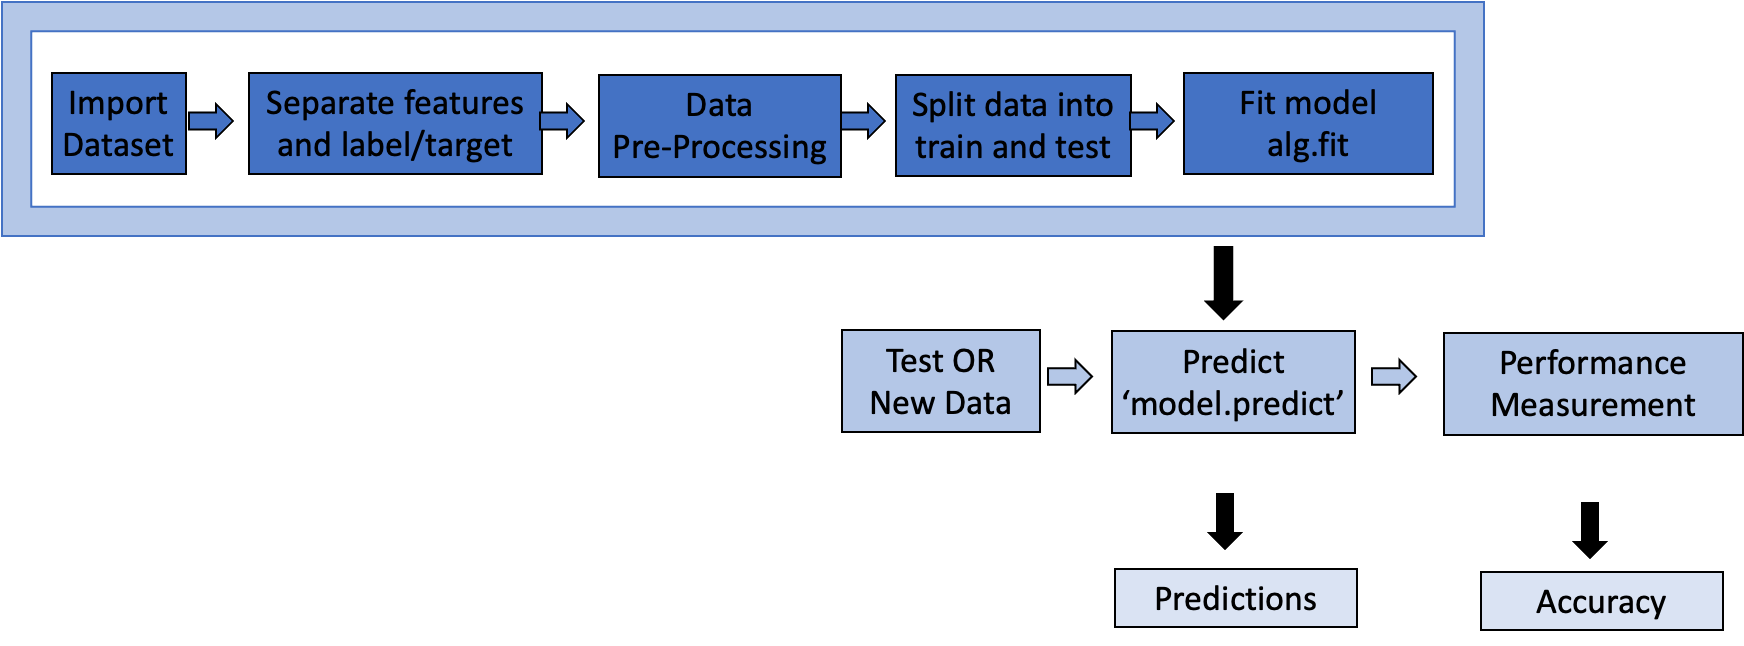

In [1]:
# Import the required libraries libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
# Let us generate some data for regression
# sklearn library has a function called "make_regression" which allows us to quickly generate some data for prototyping 
# For the sake of understanding the sklearn library, I am going to import the reuired modules when they are required

from sklearn.datasets import make_regression
# sklarn datasets: module has a function called make_regression which allows us to generate data for regression

# Create X labels and y features
X,y = make_regression(n_samples=100,n_features=1,n_targets=1,random_state=42,noise=5)
# n_samples = 100 datapoints
# n_features = simple univariate data
# n_targets = 1 label
# random_state = 42, to make the data reproducible, which means the data will be the same everytime we run the code
# noise = 5, distributing the data so that they are not automatically in a straight line

print(f"Shape: {X.shape} Sample:{y.shape}")

Shape: (100, 1) Sample:(100,)


In [7]:
# Take a quick look at the data

print(f"X:\n{X[:5]}\ny:\n{y[:5]}")

X:
[[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]]
y:
[ 44.82629315  -3.21591488 -39.53420495  11.82188621 -18.86981858]


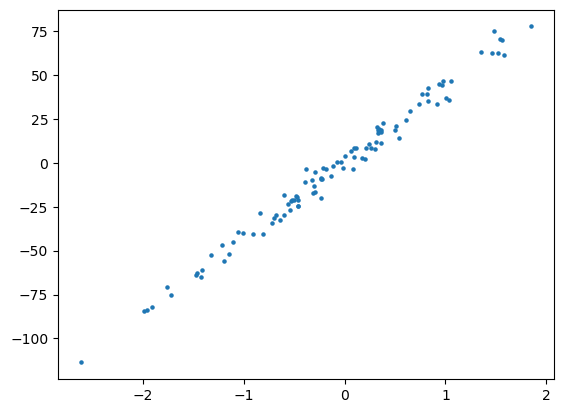

In [8]:
# Let us visualize the data
# It is highly recomended to plot data before we start building the model
# The scatter plot has no outliers, so we do not need to worry about preprocessing the data

plt.scatter(X,y,s=5)
plt.show()

In this example, we already have the features and label (X and y) separately. In real datasest, which is usually a .csv file and is read in as a DataFrame, we would have to generate the X and y by separating the features and label.

In [9]:
# Now we are ready to split the data into train and test parts
# Here we will import our first sklearn function to do this split
# The command we will use is 'train_test_split()'

from sklearn.model_selection import train_test_split   # Either you know where this function is available from practice or you look-up

In [12]:
# The above function will give us training data (to train a model) and test data (to evaluate the model)
# Training data will have 'X_train & y_train' and 'test data X_test & y_test'

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=42)
# test_size = 0.1, (USE DECIMALS) means 10% of the data will be used for testing and 90% for training
# random_state = 42, where the same random shuffle will be used everytime we run the code

# Let us see if this did it right
# We should have 89 training samples and 10 testing samples
print(X_train.shape,X_test.shape,type(X_train))

(90, 1) (10, 1) <class 'numpy.ndarray'>


In [13]:
# Now comes the time to select an algorithm from the sklearn library
# Let us import 'Linear Regression', which is the most basic regression algorithm

from sklearn.linear_model import LinearRegression # LinearRegression() is a class 

In [14]:
linreg = LinearRegression() # instantiate a LinearRegression object
# If you look at the guide, there are many arguments you can feed but
# We shall stick to the basic algorithm with defaults

# We can now use the training data to train/build/fit a model and it is as simple as:
linreg.fit(X_train,y_train)

# Let us use the model we have built to predict y_train from X_train
y_train_pred = linreg.predict(X_train)
# compare the actual and predicted values of y_train to see the error
# allows us to compute the training accuracy of the model

In [15]:
# Now we can use this model to predict on the retained test values
y_pred = linreg.predict(X_test)

print(f"Predicted values for the test data are:\n{y_pred}")

Predicted values for the test data are:
[-56.85296052  63.64697825  35.07444027 -16.6554874   -9.87252309
 -12.34344746 -19.8169789  -75.52665886  35.47709791  40.17404007]


In [16]:
# Now we want to measure the metrics of our models
# We want to see with what minimum error the model was built with train data?
# What is the error on the test data?

# To do this, we import the metrics from the sklearn metrics sub modules

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [18]:
# MSE
print(f"Means Sqaure Error of our model is: {mean_squared_error(y_train_pred,y_train)}")

# RMSE
print(f"Root Means Sqaure Error of our model is: {np.sqrt(mean_squared_error(y_train_pred,y_train))}")
# in context of the data (100 data points), this is an acceptable error

Means Sqaure Error of our model is: 18.287935132766417
Root Means Sqaure Error of our model is: 4.276439539238971


In [20]:
# Let us see how our model did on the test data and let us check all the available metrics

print(f"Root Mean Square Error on test data: {np.sqrt(mean_squared_error(y_pred,y_test))}") 
# we can say that the model is good if the RMSE is less than 10% of the mean of the target variable

print(f"Mean Absolute Error on test data: {mean_absolute_error(y_pred,y_test)}")
# we can say there are perhaps no outliers if the MAE is less than 10% of the mean of the target variable

print(f"R2 Score: {r2_score(y_pred,y_test)}")
# 98% of the variance in the target variable is explained by the model, which is a good model


Root Mean Square Error on test data: 5.674511021767614
Mean Absolute Error on test data: 4.852631004183461
R2 Score: 0.9820934998374382


In [22]:
# Let us take a look at the coefficients and the intercept value of regression and also plot the line of regression
# The coefficients are available as a method in the model

coefficients = linreg.coef_ # gives us the slope of the line
intercept = linreg.intercept_ # gives us the intercept of the line

# Use squeeze to remove dimensional aspects and make the number a scalar
print(f"Slope: {coefficients} and Intercept: {intercept}")

Slope: [42.94244453] and Intercept: 0.18259521200026807


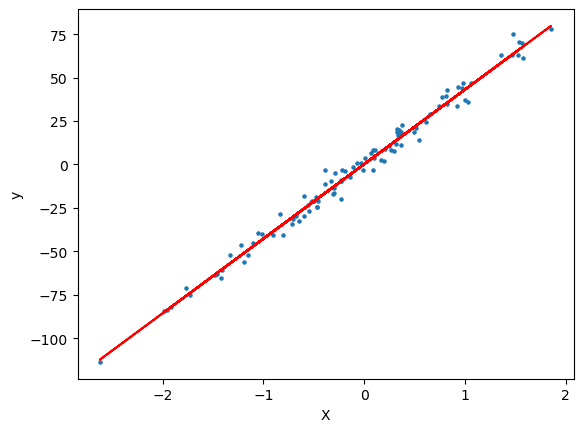

In [23]:
# Plot line of regression

plt.scatter(X,y,s=5)
plt.plot(X,linreg.predict(X),c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [24]:
# We can conclude that the model is fairly accurate and does equally well on test data
# In other words we say - The Model "Generalizes" well

# Now we can use the model and predict the output for a new input
# New input / inputs should be fed as a numpy array or as a pandas series
new_input = np.array([[0.5]])

# Predict and check on line of regrerssion
linreg.predict(new_input)

array([21.65381748])